In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [130]:
import sklearn.metrics as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

In [131]:
path_data = "/content/releve_de_1000_etudiants_series_S2.csv"
data = pd.read_csv(path_data)

In [132]:
data.tail(10)

,Maths,PC,SVT,Philo,Fr,Anglais,HG
990,15.0,12.0,16.0,14.0,10.0,16.0,12.0
991,16.0,16.0,14.0,6.0,14.0,11.0,10.0
992,6.0,14.0,9.0,11.0,13.0,19.0,11.0
993,9.0,9.0,6.0,6.0,10.0,16.0,15.0
994,9.0,12.0,11.0,8.0,16.0,11.0,14.0
995,9.0,6.0,19.0,10.0,14.0,12.0,12.0
996,10.0,14.0,14.0,6.0,16.0,17.0,7.0
997,6.0,16.0,11.0,10.0,15.0,10.0,11.0
998,14.0,13.0,8.0,11.0,13.0,14.0,9.0
999,14.0,6.0,10.0,14.0,13.0,7.0,11.0


In [133]:
data["Moy"] = round((data.Maths*5 + data.PC*6 +	data.SVT*6 + data.Philo*2	+ data.Fr*3	+ data.Anglais*2	+ data.HG*2) / 26, 2)

In [134]:
data

,Maths,PC,SVT,Philo,Fr,Anglais,HG,Moy
0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.00
1,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.00
2,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.00
3,11.0,13.0,8.0,11.0,11.0,10.0,7.0,10.38
4,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.00
...,...,...,...,...,...,...,...,...
995,9.0,6.0,19.0,10.0,14.0,12.0,12.0,11.73
996,10.0,14.0,14.0,6.0,16.0,17.0,7.0,12.54
997,6.0,16.0,11.0,10.0,15.0,10.0,11.0,11.50
998,14.0,13.0,8.0,11.0,13.0,14.0,9.0,11.65


In [135]:
data = data[data["Moy"] >= 10]

In [136]:
data.shape

(924, 8)

In [137]:
# data[["Maths", "PC", "SVT", "Philo", "Fr", "Anglais", "HG", "Moy"]] = StandardScaler().fit_transform(data[["Maths", "PC", "SVT", "Philo", "Fr", "Anglais", "HG", "Moy"]])

<Figure size 2160x504 with 0 Axes>

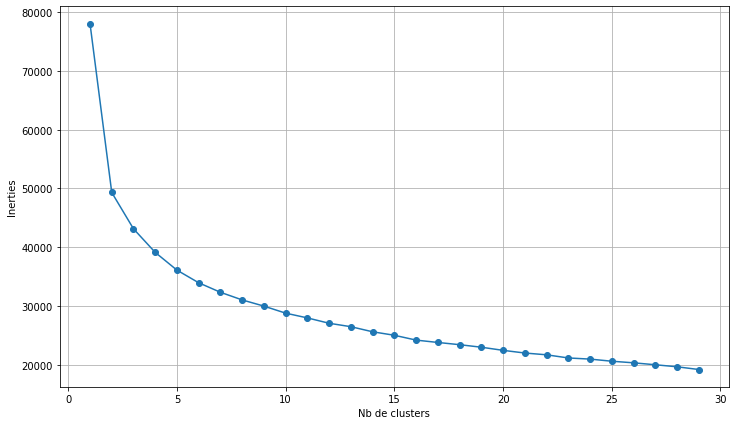

In [138]:
def optimize_k_mean(data, max_k):
  means = []
  inerties = []

  for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)

    means.append(k)
    inerties.append(kmeans.inertia_)

  plt.figure(figsize=(30, 7))
  fig = plt.subplots(figsize=(12, 7))
  plt.plot(means, inerties, 'o-')
  plt.xlabel("Nb de clusters")
  plt.ylabel('Inerties')
  plt.grid(True)
  plt.show()

optimize_k_mean(data, 30)

In [139]:
# Grid search k allant de 1 à 5

In [140]:
data = np.array(data)
data

array([[16.  , 16.  , 16.  , ..., 16.  , 16.  , 16.  ],
       [16.  , 16.  , 16.  , ..., 16.  , 16.  , 16.  ],
       [16.  , 16.  , 16.  , ..., 16.  , 16.  , 16.  ],
       ...,
       [ 6.  , 16.  , 11.  , ..., 10.  , 11.  , 11.5 ],
       [14.  , 13.  ,  8.  , ..., 14.  ,  9.  , 11.65],
       [14.  ,  6.  , 10.  , ...,  7.  , 11.  , 10.35]])

In [141]:
kmeans = KMeans(n_clusters=27, random_state=1)
kmeans.fit(data)

KMeans(n_clusters=27, random_state=1)

In [142]:
# data['kmeans_3'] = kmeans.labels_

In [143]:
# for i in range(0, 27):
#   print("-"*10)
#   print(f"Cluster {i}")
#   print("-"*10)
#   for j in data[kmeans.labels_==i]:
#     print(f"Indi : {j[:-1]}, Moy : {j[-1]}")

In [144]:
# plt.figure(figsize=(30, 10))
# plt.scatter(data[kmeans.labels_ == 0][:, 0], data[kmeans.labels_ == 0][:, 1], s=50, c="y")
# plt.scatter(data[kmeans.labels_ == 1][:, 0], data[kmeans.labels_ == 1][:, 1], s=50, c="r")
# plt.scatter(data[kmeans.labels_ == 3][:, 0], data[kmeans.labels_ == 3][:, 1], s=50, c="g")
# plt.scatter(data[kmeans.labels_ == 4][:, 0], data[kmeans.labels_ == 4][:, 1], s=50, c="c")
# plt.scatter(data[kmeans.labels_ == 5][:, 0], data[kmeans.labels_ == 5][:, 1], s=50, c="m")
# plt.scatter(data[kmeans.labels_ == 6][:, 0], data[kmeans.labels_ == 6][:, 1], s=50, c="b")
# plt.scatter(data[kmeans.labels_ == 7][:, 0], data[kmeans.labels_ == 7][:, 1], s=50, c="k")
# plt.scatter(data[kmeans.labels_ == 8][:, 0], data[kmeans.labels_ == 8][:, 1], s=50)

In [145]:
kmeans.predict([[12, 16, 11, 11, 12, 14, 17, 14.15]])

array([22], dtype=int32)

In [146]:
# import pickle
# pickle.dump(kmeans, open('kmeans.pkl', "wb"))

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

class Clustering:
  def __init__(self, df) ->None:
    self.df = df

  def clustering(self, n):
    kmeans = KMeans(n_clusters=n, random_state=1)
    kmeans.fit(self.df)
    return kmeans

  def viewClusters(self, n):
    for i in range(0, 27):
      print("-"*10)
      print(f"Cluster {i}")
      print("-"*10)
      for j in self.df[self.clustering(n).labels_==i]:
        print(f"Indi : {j[:-1]}, Moy : {j[-1]}")

  def viewScatter(self, n):
    color = ["y", "r", "g", "b", "c", "m", "k"]
    for i in range(2):
      plt.scatter(self.df[self.clustering(n).labels_ == i][:, 0], self.df[self.clustering(n).labels_ == i][:, 1], s=50, c=color[i])

  def predict(self, val, n):
    return self.clustering(n).predict([val])

  def exportAsPickle(self, name, n):
    pickle.dump(self.clustering(n), open(f'{name}.pkl', "wb"))

In [148]:
C = Clustering(data)

In [149]:
C.clustering(27)

KMeans(n_clusters=27, random_state=1)

In [150]:
C.viewClusters(27)

----------
Cluster 0
----------
Indi : [10. 13.  7. 10. 11. 10. 15.], Moy : 10.5
Indi : [12. 15. 14. 11.  6.  9. 15.], Moy : 12.38
Indi : [ 6. 17.  8. 12.  6. 10. 11.], Moy : 10.15
Indi : [11. 14. 11.  8.  7.  9. 11.], Moy : 10.85
Indi : [11. 14. 12. 12.  9. 10. 14.], Moy : 11.92
Indi : [13. 17.  6.  9.  7.  8. 14.], Moy : 11.0
Indi : [ 9. 13. 14. 14.  6. 10. 11.], Moy : 11.35
Indi : [ 9. 17.  8. 10.  8.  7. 15.], Moy : 10.88
Indi : [10. 15. 10. 13.  8. 12. 14.], Moy : 11.62
Indi : [14. 10. 10. 13.  6.  6. 12.], Moy : 10.38
Indi : [13. 11.  9. 12. 10. 11. 16.], Moy : 11.27
Indi : [ 9. 12.  9. 12.  6.  9. 15.], Moy : 10.04
Indi : [10.  9. 13. 10.  8.  9. 13.], Moy : 10.38
Indi : [15. 14.  6.  9.  8. 11. 16.], Moy : 11.19
Indi : [ 7. 14. 13. 11.  6. 13. 15.], Moy : 11.27
Indi : [11. 12. 12. 11. 11.  9. 16.], Moy : 11.69
Indi : [11. 13. 13. 10.  9. 10. 10.], Moy : 11.46
Indi : [12. 15.  6. 11.  6. 12. 14.], Moy : 10.69
Indi : [10. 12. 13. 14.  6.  6. 11.], Moy : 10.77
Indi : [ 8. 13. 10. 

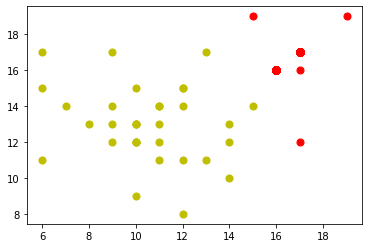

In [151]:
C.viewScatter(27)

In [152]:
C.predict([12, 16, 11, 11, 12, 14, 17, 14.15], 27)

array([22], dtype=int32)

In [153]:
C.exportAsPickle("model_S2", 27)

In [154]:
path_data = "/content/releve_de_1000_etudiants_series_L2.csv"
data_l = pd.read_csv(path_data)
data_l

,Philo,HG,Fr,Anglais,LV2,PC_SVT,Maths,Oral_LV1
0,12.0,14.0,8.0,15.0,10.0,6.0,9.0,12
1,14.0,13.0,8.0,14.0,12.0,14.0,13.0,10
2,8.0,13.0,10.0,18.0,15.0,12.0,8.0,11
3,12.0,13.0,7.0,19.0,14.0,19.0,8.0,13
4,18.0,7.0,9.0,14.0,12.0,6.0,8.0,10
...,...,...,...,...,...,...,...,...
995,13.0,7.0,15.0,12.0,12.0,10.0,16.0,10
996,17.0,10.0,11.0,10.0,15.0,11.0,14.0,10
997,6.0,9.0,11.0,11.0,13.0,15.0,11.0,14
998,19.0,14.0,9.0,19.0,8.0,14.0,18.0,11


In [155]:
data_l["Moy"] = round(( data_l.Philo*6	+ data_l.HG*6 + data_l.Fr*5	+ data_l.Anglais*4 + data_l.LV2*2 + data_l.PC_SVT*2 + data_l.Maths*2 + data_l.Oral_LV1) / 28, 2)

In [156]:
data_l = data_l[data_l["Moy"] >= 10]

In [157]:
data_l.shape

(943, 9)

<Figure size 2160x504 with 0 Axes>

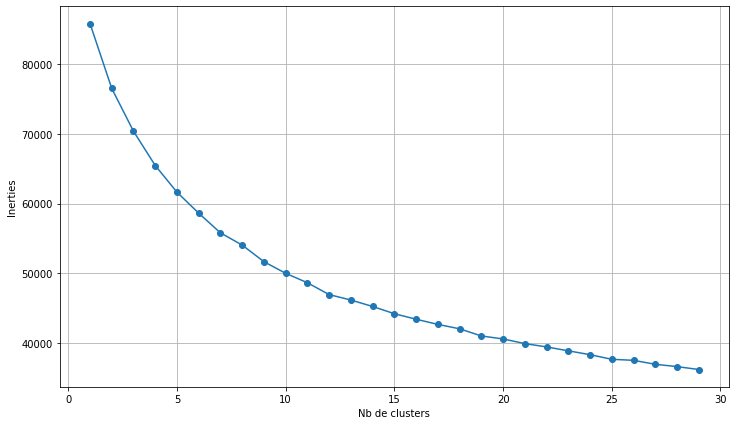

In [158]:
optimize_k_mean(data_l, 30)

(array([32., 28., 53., 55., 58., 76., 51., 81., 72., 57., 64., 59., 57.,
        49., 19., 36., 23., 22., 17., 21.,  5.,  4.,  1.,  1.,  2.]),
 array([10.    , 10.2472, 10.4944, 10.7416, 10.9888, 11.236 , 11.4832,
        11.7304, 11.9776, 12.2248, 12.472 , 12.7192, 12.9664, 13.2136,
        13.4608, 13.708 , 13.9552, 14.2024, 14.4496, 14.6968, 14.944 ,
        15.1912, 15.4384, 15.6856, 15.9328, 16.18  ]),
 <a list of 25 Patch objects>)

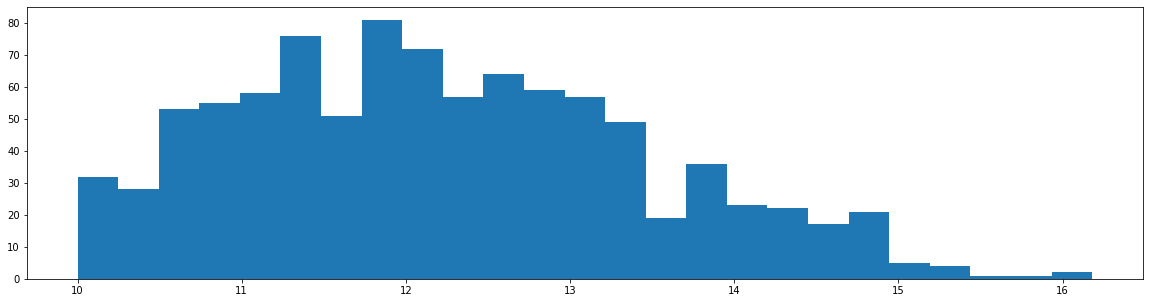

In [159]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
plt.hist(data_l.Moy, bins=25)

In [160]:
data_l = np.array(data_l)
data_l

array([[12.  , 14.  ,  8.  , ...,  9.  , 12.  , 11.36],
       [14.  , 13.  ,  8.  , ..., 13.  , 10.  , 12.36],
       [ 8.  , 13.  , 10.  , ...,  8.  , 11.  , 11.75],
       ...,
       [ 6.  ,  9.  , 11.  , ..., 11.  , 14.  , 10.04],
       [19.  , 14.  ,  9.  , ..., 18.  , 11.  , 14.64],
       [18.  ,  6.  , 12.  , ...,  7.  , 10.  , 11.79]])

In [161]:
C_L = Clustering(data_l)

In [162]:
C_L.clustering(27)

KMeans(n_clusters=27, random_state=1)

In [163]:
C_L.viewClusters(27)

----------
Cluster 0
----------
Indi : [15. 19. 16. 11. 15.  8. 14. 10.], Moy : 14.71
Indi : [15. 17. 18. 12. 13. 10. 16. 12.], Moy : 15.0
Indi : [19. 12. 18.  9. 13. 10. 13. 14.], Moy : 14.21
Indi : [13. 13. 19.  9. 17. 13. 14. 13.], Moy : 13.86
Indi : [15. 11. 15. 14. 15. 12. 15. 11.], Moy : 13.64
Indi : [13. 12. 19. 17. 19. 12. 14. 10.], Moy : 14.75
Indi : [19. 13. 18. 16. 16.  8. 17. 10.], Moy : 15.64
Indi : [15. 15. 15. 11. 15. 11. 14. 12.], Moy : 13.96
Indi : [19. 17. 18.  8. 14.  8. 12. 12.], Moy : 14.93
Indi : [13. 19. 15. 14. 19.  8. 15. 14.], Moy : 15.04
Indi : [18. 13. 14. 16. 17. 10. 14. 14.], Moy : 14.86
Indi : [14. 14. 16. 11. 17. 12. 13. 12.], Moy : 13.86
Indi : [13. 16. 18. 15. 14.  8.  9. 14.], Moy : 14.29
Indi : [13. 16. 17. 15. 15.  9. 14. 11.], Moy : 14.5
Indi : [16. 11. 19. 15. 14. 12. 16. 14.], Moy : 14.82
Indi : [15. 13. 16. 14. 15. 13. 19. 15.], Moy : 14.75
Indi : [13. 11. 14. 14. 15.  9. 12. 15.], Moy : 12.75
Indi : [11. 13. 18. 16. 17.  9. 12. 15.], Moy : 13.8

In [164]:
C_L.exportAsPickle("model_L2", 27)

In [168]:
C_L.predict([9, 16,  9,  7, 12, 16, 13, 13, 11.36], 27)

array([26], dtype=int32)